SIMPLE LINEAR REGRESSION

  1.Read the dataset
  2.EDA,FE
  3.Divide our dataset into independent and dependend feature
  4.Further divide the dataset into train and test
  5.Standard Scaling  on the train and test data(x_tain=fit_tra,x_test=tra) 
  6.Model Training simple linaer regression fit (x_train_scaled,y_tarin) (intercep,coef)
  7.Predication for test data (y_prd) using x_test_scaled
  8.Performace metrics MSE,MAE,RMES
  9.Accuracy of model R Squared and Adujested R Squared 
  10.pickel the scaler and regressor file for future 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
%matplotlib inline


In [6]:
df=pd.read_csv('height-weight.csv')

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

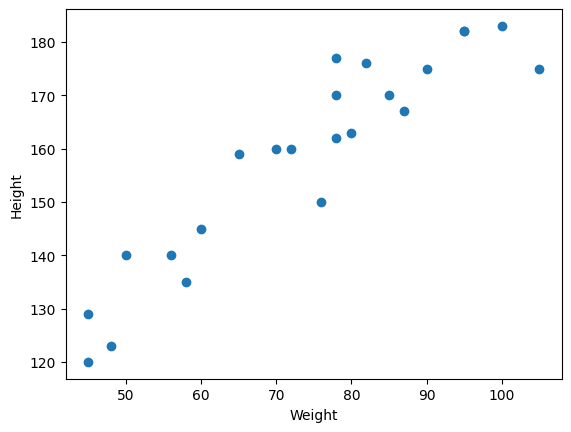

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [10]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [11]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [17]:
##Divide our dataset into independent and dependend feature
X=df[['Weight']]##independent Feature
y=df['Height']#dependent Feature

In [18]:
X.shape

(23, 1)

In [19]:
y.shape

(23,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [23]:
y_train.shape,y_test.shape

((18,), (5,))

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

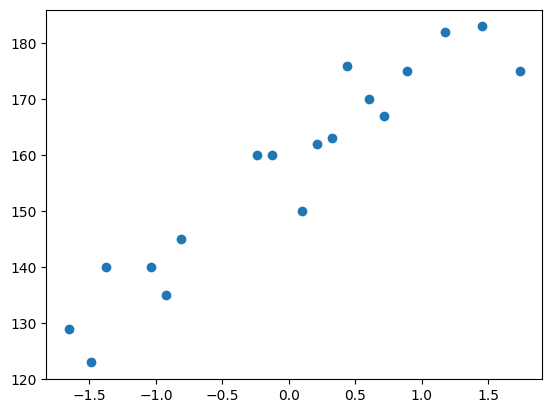

In [30]:
plt.scatter(X_train,y_train)

In [31]:
#Model Training
from sklearn.linear_model import LinearRegression

In [32]:
regressor=LinearRegression()

In [33]:
##Training thr train data
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
regressor.intercept_##thita0

157.5

In [35]:
regressor.coef_##thita1

array([17.03440872])

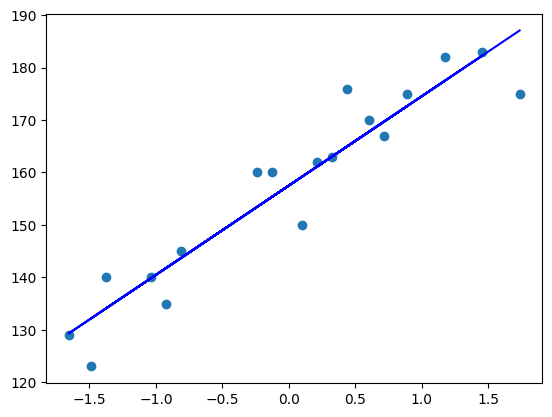

In [38]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'b')


In [39]:
##Prediction for test data
Y_pred_test=regressor.predict(X_test)

In [40]:
Y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [41]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [42]:
#Performace matrics MES,MAE,RMES

In [43]:
from sklearn.metrics  import mean_squared_error,mean_absolute_error

In [47]:
MES=mean_squared_error(y_test,Y_pred_test)
MAE=mean_absolute_error(y_test,Y_pred_test)
RMSE=np.sqrt(MES)
print(MES)
print(MAE)
print(RMSE)

109.77592599051664
9.822657814519232
10.477400726827081


In [48]:
##Accuracy of model R squared and Adujested R Squared

In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Y_pred_test)
score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [51]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [52]:
scaler

StandardScaler()

In [53]:
regressor

LinearRegression()